# Explore here

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [71]:
url = 'https://breathecode.herokuapp.com/asset/internal-link?id=929&path=medical_insurance_cost.csv'
df = pd.read_csv(url, encoding= 'utf-8', quotechar= '"')#.to_csv('../data/raw/medical_insurance_cost.csv', index=False, encoding= 'utf-8')

EDA

📌 Vista general del dataset:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



📏 Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

📊 Estadísticas descriptivas:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


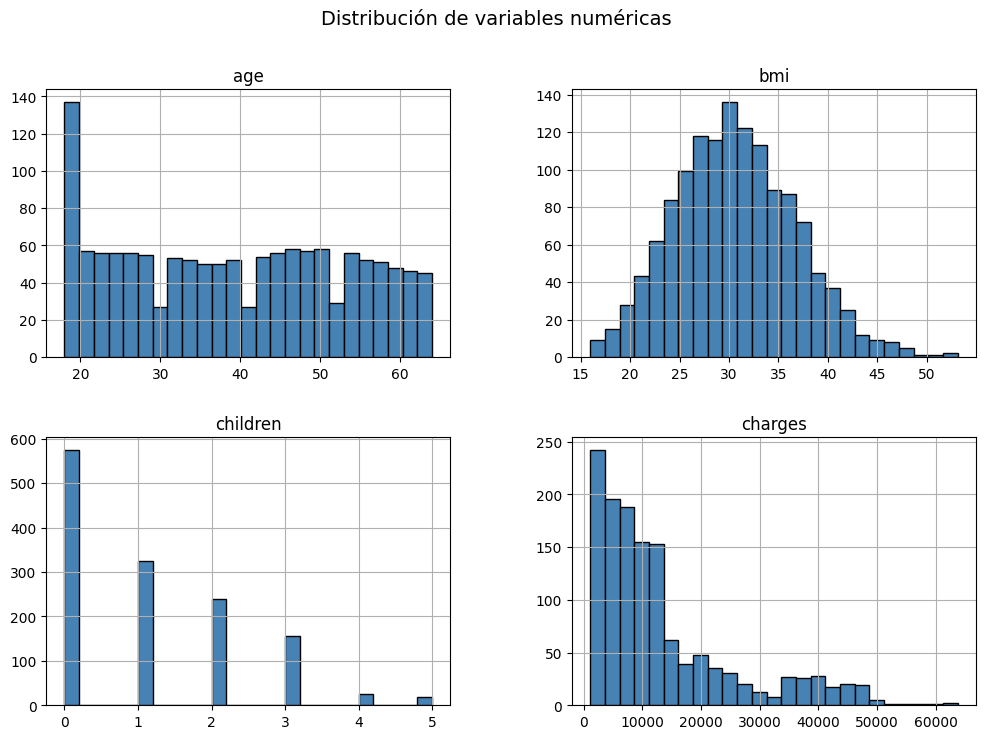

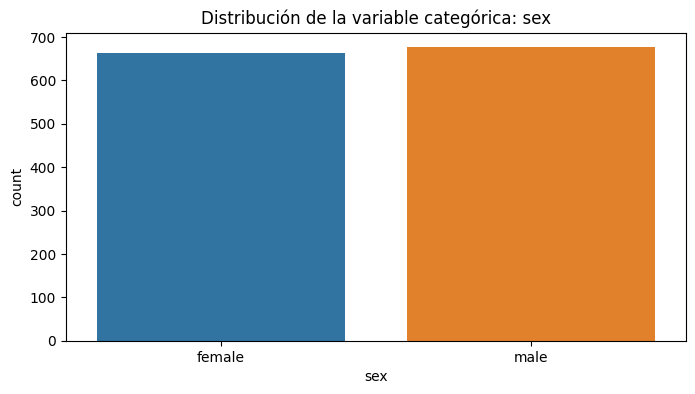

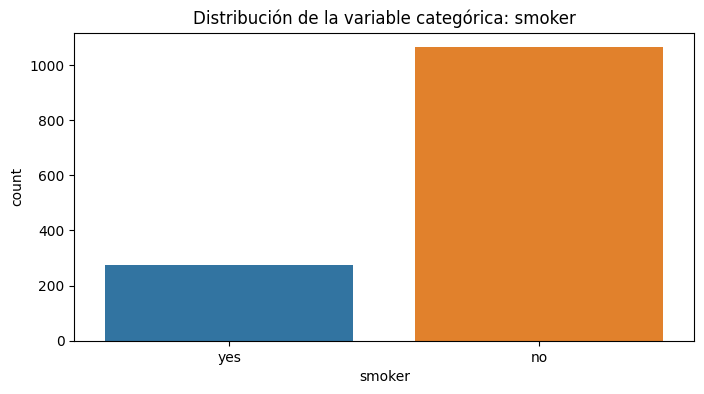

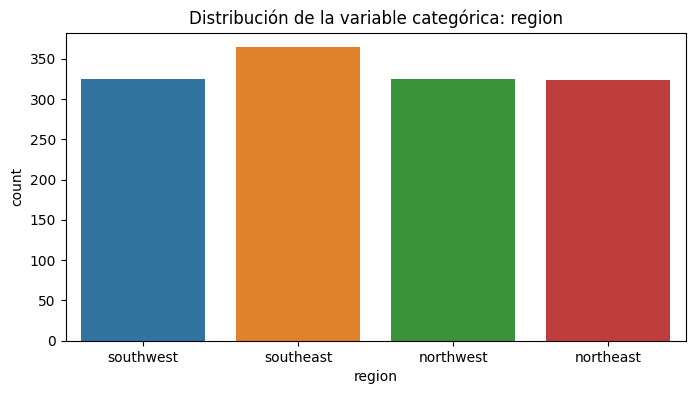

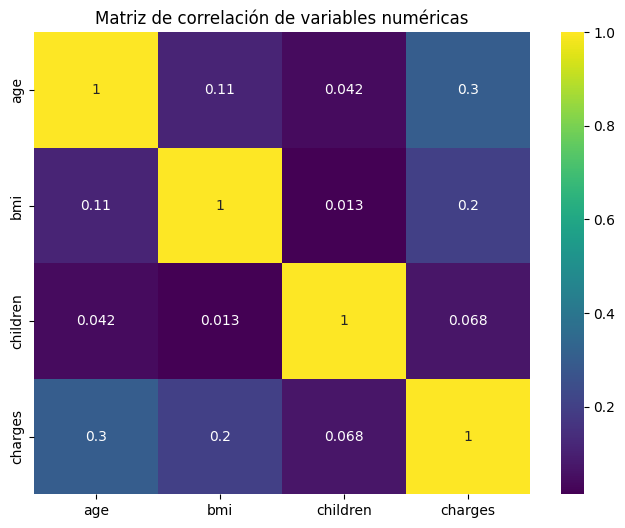

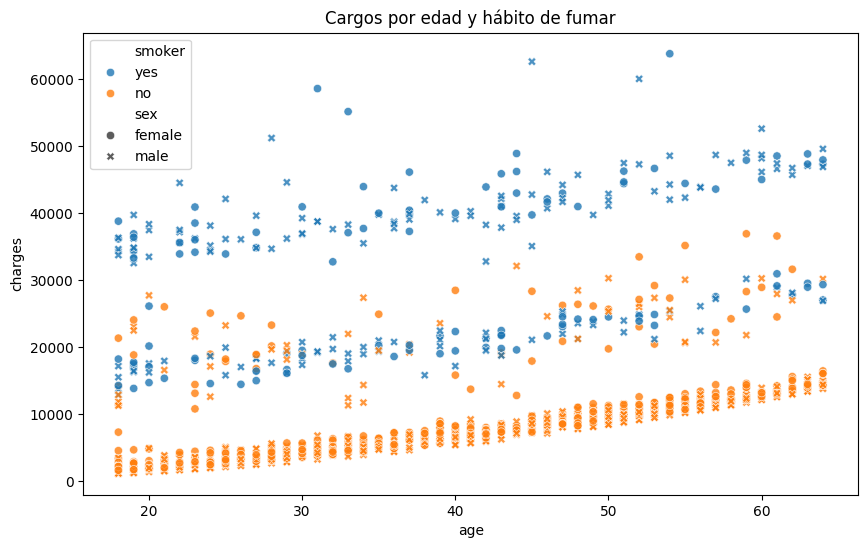

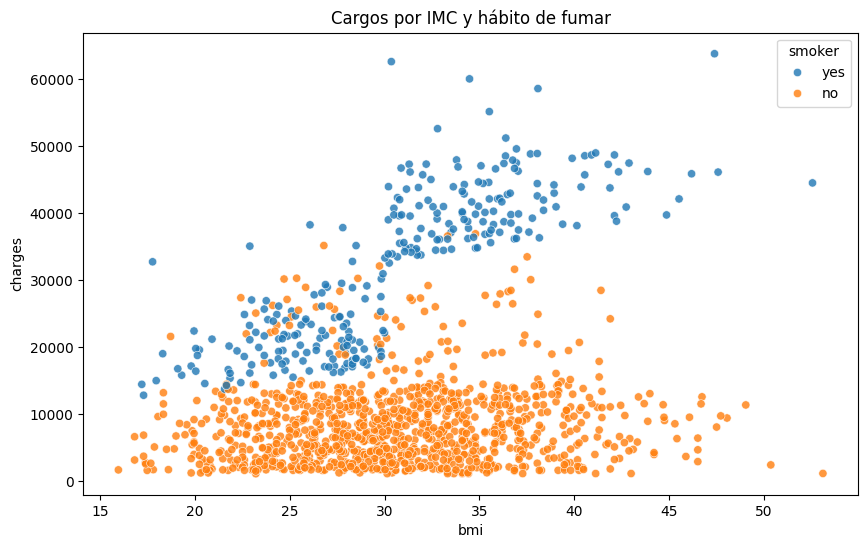

In [72]:
print("📌 Vista general del dataset:")
display(df.head())

print("\n📏 Información del dataset:")
print(df.info())

print("\n📊 Estadísticas descriptivas:")
display(df.describe())

numeric_cols = df.select_dtypes(include=[np.number]).columns

df[numeric_cols].hist(bins=25, figsize=(12, 8), color='steelblue', edgecolor='black')
plt.suptitle("Distribución de variables numéricas", fontsize=14)
plt.show()

categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, hue=col, legend=False)
    plt.title(f"Distribución de la variable categórica: {col}")
    plt.show()

corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.title("Matriz de correlación de variables numéricas")
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker', style='sex', alpha=0.8)
plt.title('Cargos por edad y hábito de fumar')
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', alpha=0.8)
plt.title('Cargos por IMC y hábito de fumar')
plt.show()

PROCESAMIENTO Y ESCALADO

In [73]:
X = df.drop('charges', axis=1).reset_index(drop=True)
y = df['charges'].reset_index(drop=True)



for col in ['sex', 'smoker', 'region']:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

num_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

print("\n Escalado completado")
display(pd.DataFrame(X_train_scaled[num_cols].describe()).round(2))


 Escalado completado


,age,bmi,children
count,1070.00,1070.00,1070.00
mean,-0.00,-0.00,-0.00
std,1.00,1.00,1.00
min,-1.52,-2.42,-0.91
25%,-0.88,-0.72,-0.91
50%,0.01,-0.06,-0.09
75%,0.83,0.65,0.73
max,1.75,3.74,3.20


In [74]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 33635210.43117839
R²: 0.783346310736454


In [75]:
y_pred = model.predict(X_test_scaled)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 33635210.43117839
R²: 0.783346310736454



Errores más altos:
           y_test        y_pred         error
543   63770.42801  40959.081722 -22811.346288
430   23082.95533   3219.185539 -19863.769791
1039  22493.65964   2652.651983 -19841.007657
599   33471.97189  14599.418238 -18872.553652
115   30259.99556  13059.649530 -17200.346030


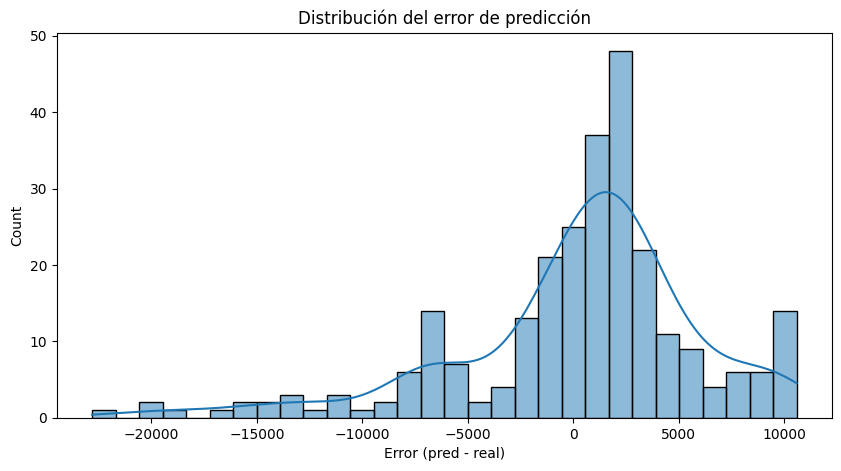

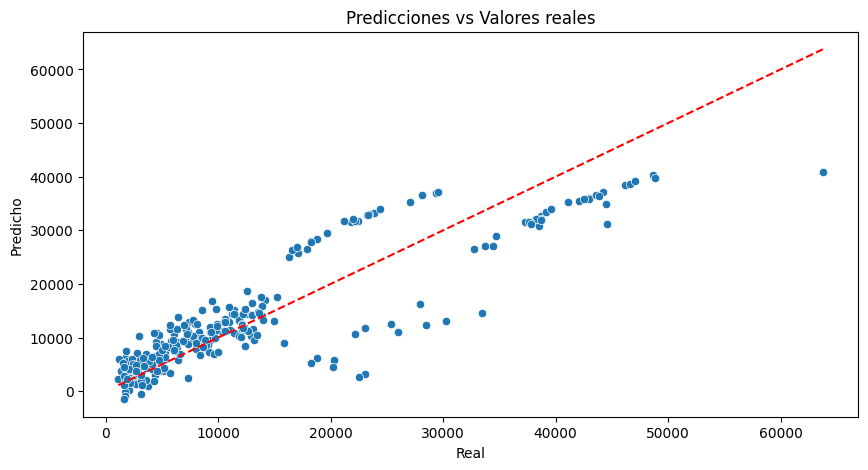

In [76]:
errors = pd.DataFrame({
    'y_test': y_test,
    'y_pred': y_pred,
    'error': y_pred - y_test
})
print("\nErrores más altos:")
print(errors.sort_values('error', key=abs, ascending=False).head())

plt.figure(figsize=(10,5))
sns.histplot(errors['error'], bins=30, kde=True)
plt.title("Distribución del error de predicción")
plt.xlabel("Error (pred - real)")
plt.show()

plt.figure(figsize=(10,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Predicciones vs Valores reales")
plt.xlabel("Real")
plt.ylabel("Predicho")
plt.show()

In [77]:
print("\nCoeficientes del modelo:")
for feature, coef in zip(X_train_scaled.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"\nIntercepto: {model.intercept_:.2f}")


Coeficientes del modelo:
age: 3616.1087
sex: -18.7915
bmi: 2028.3086
children: 516.6626
smoker: 23647.8181
region: -271.2843

Intercepto: 8902.75


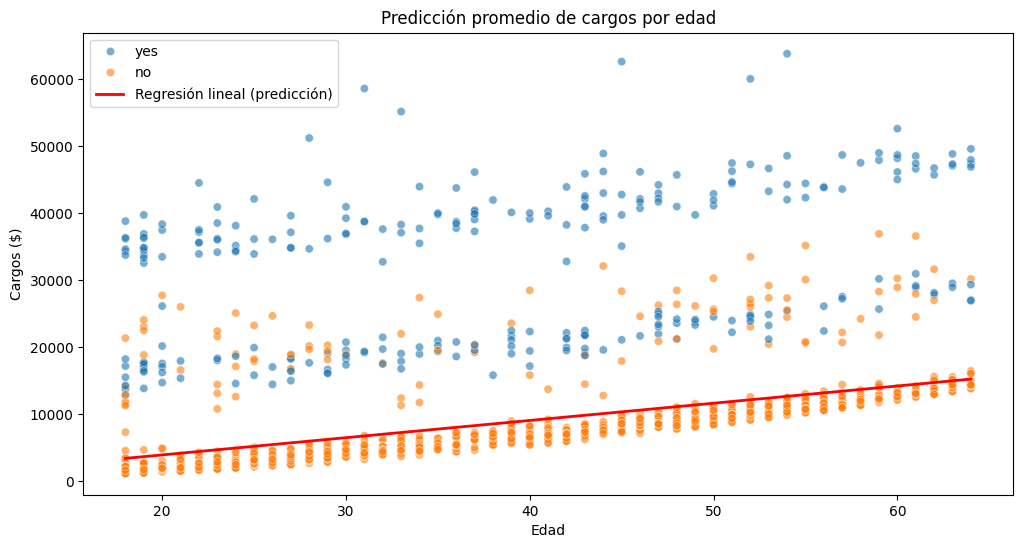

In [78]:
age_range = np.linspace(df['age'].min(), df['age'].max(), 100)
avg_bmi = X_train['bmi'].mean()
avg_children = X_train['children'].mean()
avg_sex = 0  
avg_smoker = 0 
avg_region = 0

tmp = pd.DataFrame({
    'age': age_range,
    'bmi': avg_bmi,
    'children': avg_children,
    'sex': avg_sex,
    'smoker': avg_smoker,
    'region': avg_region
})

tmp_scaled = tmp.copy()
tmp_scaled[num_cols] = scaler.transform(tmp[num_cols])
tmp_scaled = tmp_scaled[X_train.columns]  # asegurar mismo orden

y_pred_age = model.predict(tmp_scaled)

plt.figure(figsize=(12, 6))
sns.scatterplot(df, x='age', y='charges', hue='smoker', alpha=0.6)
plt.plot(age_range, y_pred_age, color='red', linewidth=2, label='Regresión lineal (predicción)')
plt.title('Predicción promedio de cargos por edad')
plt.xlabel('Edad')
plt.ylabel('Cargos ($)')
plt.legend()
plt.show()

In [79]:
#linear regression model

model = LinearRegression()

model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [80]:
y_pred = model.predict(X_test)

In [81]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64

In [82]:
#compare y_pred

y_test = y_test.reset_index(drop=True)

pred = pd.DataFrame({'y_pred':y_pred})
pred['y_test'] = y_test
pred['error'] = pred['y_pred'] - pred['y_test']
pred

,y_pred,y_test,error
0,8924.407244,9095.06825,-170.661006
1,7116.295018,5272.17580,1844.119218
2,36909.013521,29330.98315,7578.030371
3,9507.874691,9301.89355,205.981141
4,27013.350008,33750.29180,-6736.941792
...,...,...,...
263,39116.968669,47055.53210,-7938.563431
264,11814.555568,12222.89830,-408.342732
265,7638.107736,6067.12675,1570.980986
266,40959.081722,63770.42801,-22811.346288


In [83]:
mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)

(33635210.431178406, 0.7833463107364539)

In [84]:
X_descaled = df.loc[X_test.index].drop(['sex', 'smoker', 'region','charges'], axis=1)
X_descaled.head()

,age,bmi,children
764,45,25.175,2
887,36,30.020,0
890,64,26.885,0
1293,46,25.745,3
259,19,31.920,0


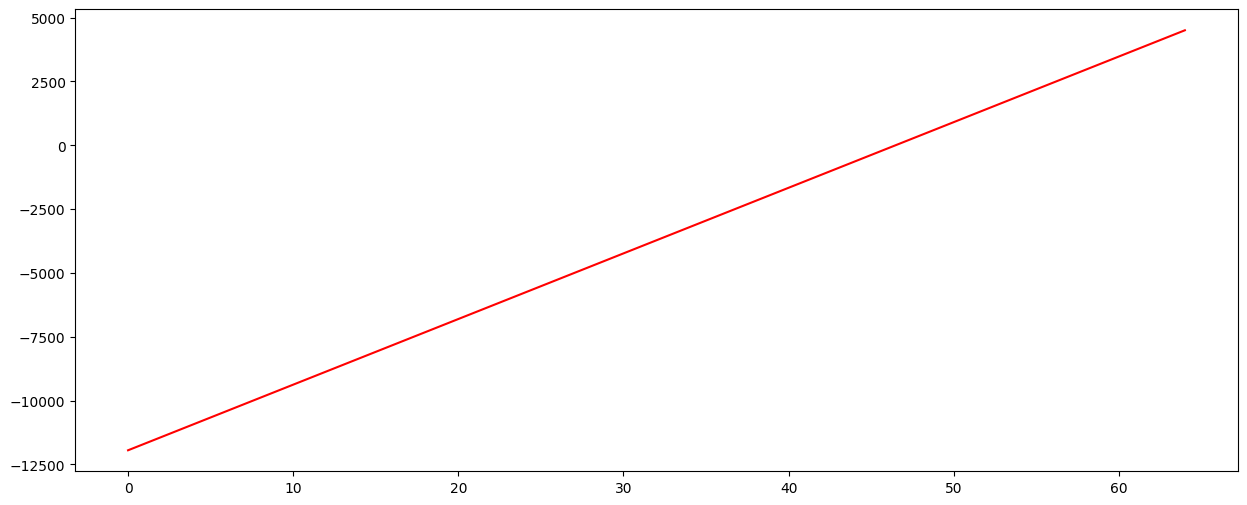

In [85]:
X_array = X_descaled.values.ravel()
m = model.coef_[0]
b = model.intercept_
regression = m * X_array + b

sorted_idx = X_array.argsort()

plt.figure(figsize=(15, 6))
plt.plot(X_array[sorted_idx], regression[sorted_idx], color='red')
plt.show()

In [86]:
print(m)
print(b)

257.0562636444156
-11946.606567263052
